In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
plt.rcParams['font.size'] = 8
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from matplotlib.patches import Circle
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns
import plotly.graph_objects as go
from scipy.interpolate import griddata

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [14]:
columns = ['strength', 'pa', 'num_images', 'pos_rms', 'mag_rms', 't_shear_str', 't_shear_pa', 'chi2', 'z', 'x', 'y', 'e', 'pow_pa', 'r_ein', 'pwi']
df = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Test/Sim 15_summary.csv', header=None, names=columns, skiprows=1)

In [15]:
df

,strength,pa,num_images,pos_rms,mag_rms,t_shear_str,t_shear_pa,chi2,z,x,y,e,pow_pa,r_ein,pwi
0,0.001,0.00000,4.0,0.006155,85.761625,0.001,0.00000,177.023600,1.0,20.81006,20.76543,0.029265,175.12510,0.491648,1.501081
1,0.001,7.34694,4.0,0.006211,86.414250,0.001,7.34694,179.578400,1.0,20.81006,20.76547,0.029272,174.57380,0.491591,1.500111
2,0.001,14.69388,4.0,0.006244,85.916300,0.001,14.69388,181.957400,1.0,20.81002,20.76545,0.029726,174.10360,0.491572,1.500620
3,0.001,22.04082,4.0,0.006223,2.908600,0.001,22.04082,193.462200,1.0,20.80900,20.75691,0.153825,175.10980,0.492122,2.099851
4,0.001,29.38776,4.0,0.006330,85.681525,0.001,29.38776,185.384700,1.0,20.80997,20.76534,0.030784,173.49760,0.491608,1.500128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.100,330.61224,6.0,NaN,NaN,0.100,330.61220,101.273200,1.0,20.82509,20.77694,0.351495,58.52007,0.493744,2.395711
4996,0.100,337.95918,4.0,0.004163,2.324925,0.100,337.95920,91.295080,1.0,20.81778,20.81004,0.554575,74.43914,0.501222,2.400000
4997,0.100,345.30612,4.0,0.000031,2.067825,0.100,345.30610,0.000003,1.0,20.81795,20.82135,0.604715,79.53444,0.505367,2.384485
4998,0.100,352.65306,4.0,0.004107,10.088150,0.100,352.65310,86.514610,1.0,20.81621,20.80349,0.344655,83.41680,0.495679,1.929828


In [16]:
# Fill missing values in pos_rms column with 1
df['pos_rms'] = df['pos_rms'].fillna(1)
df['mag_rms'] = df['mag_rms'].fillna(6000)

In [17]:
df['pos_rms'] = abs(df['pos_rms'])

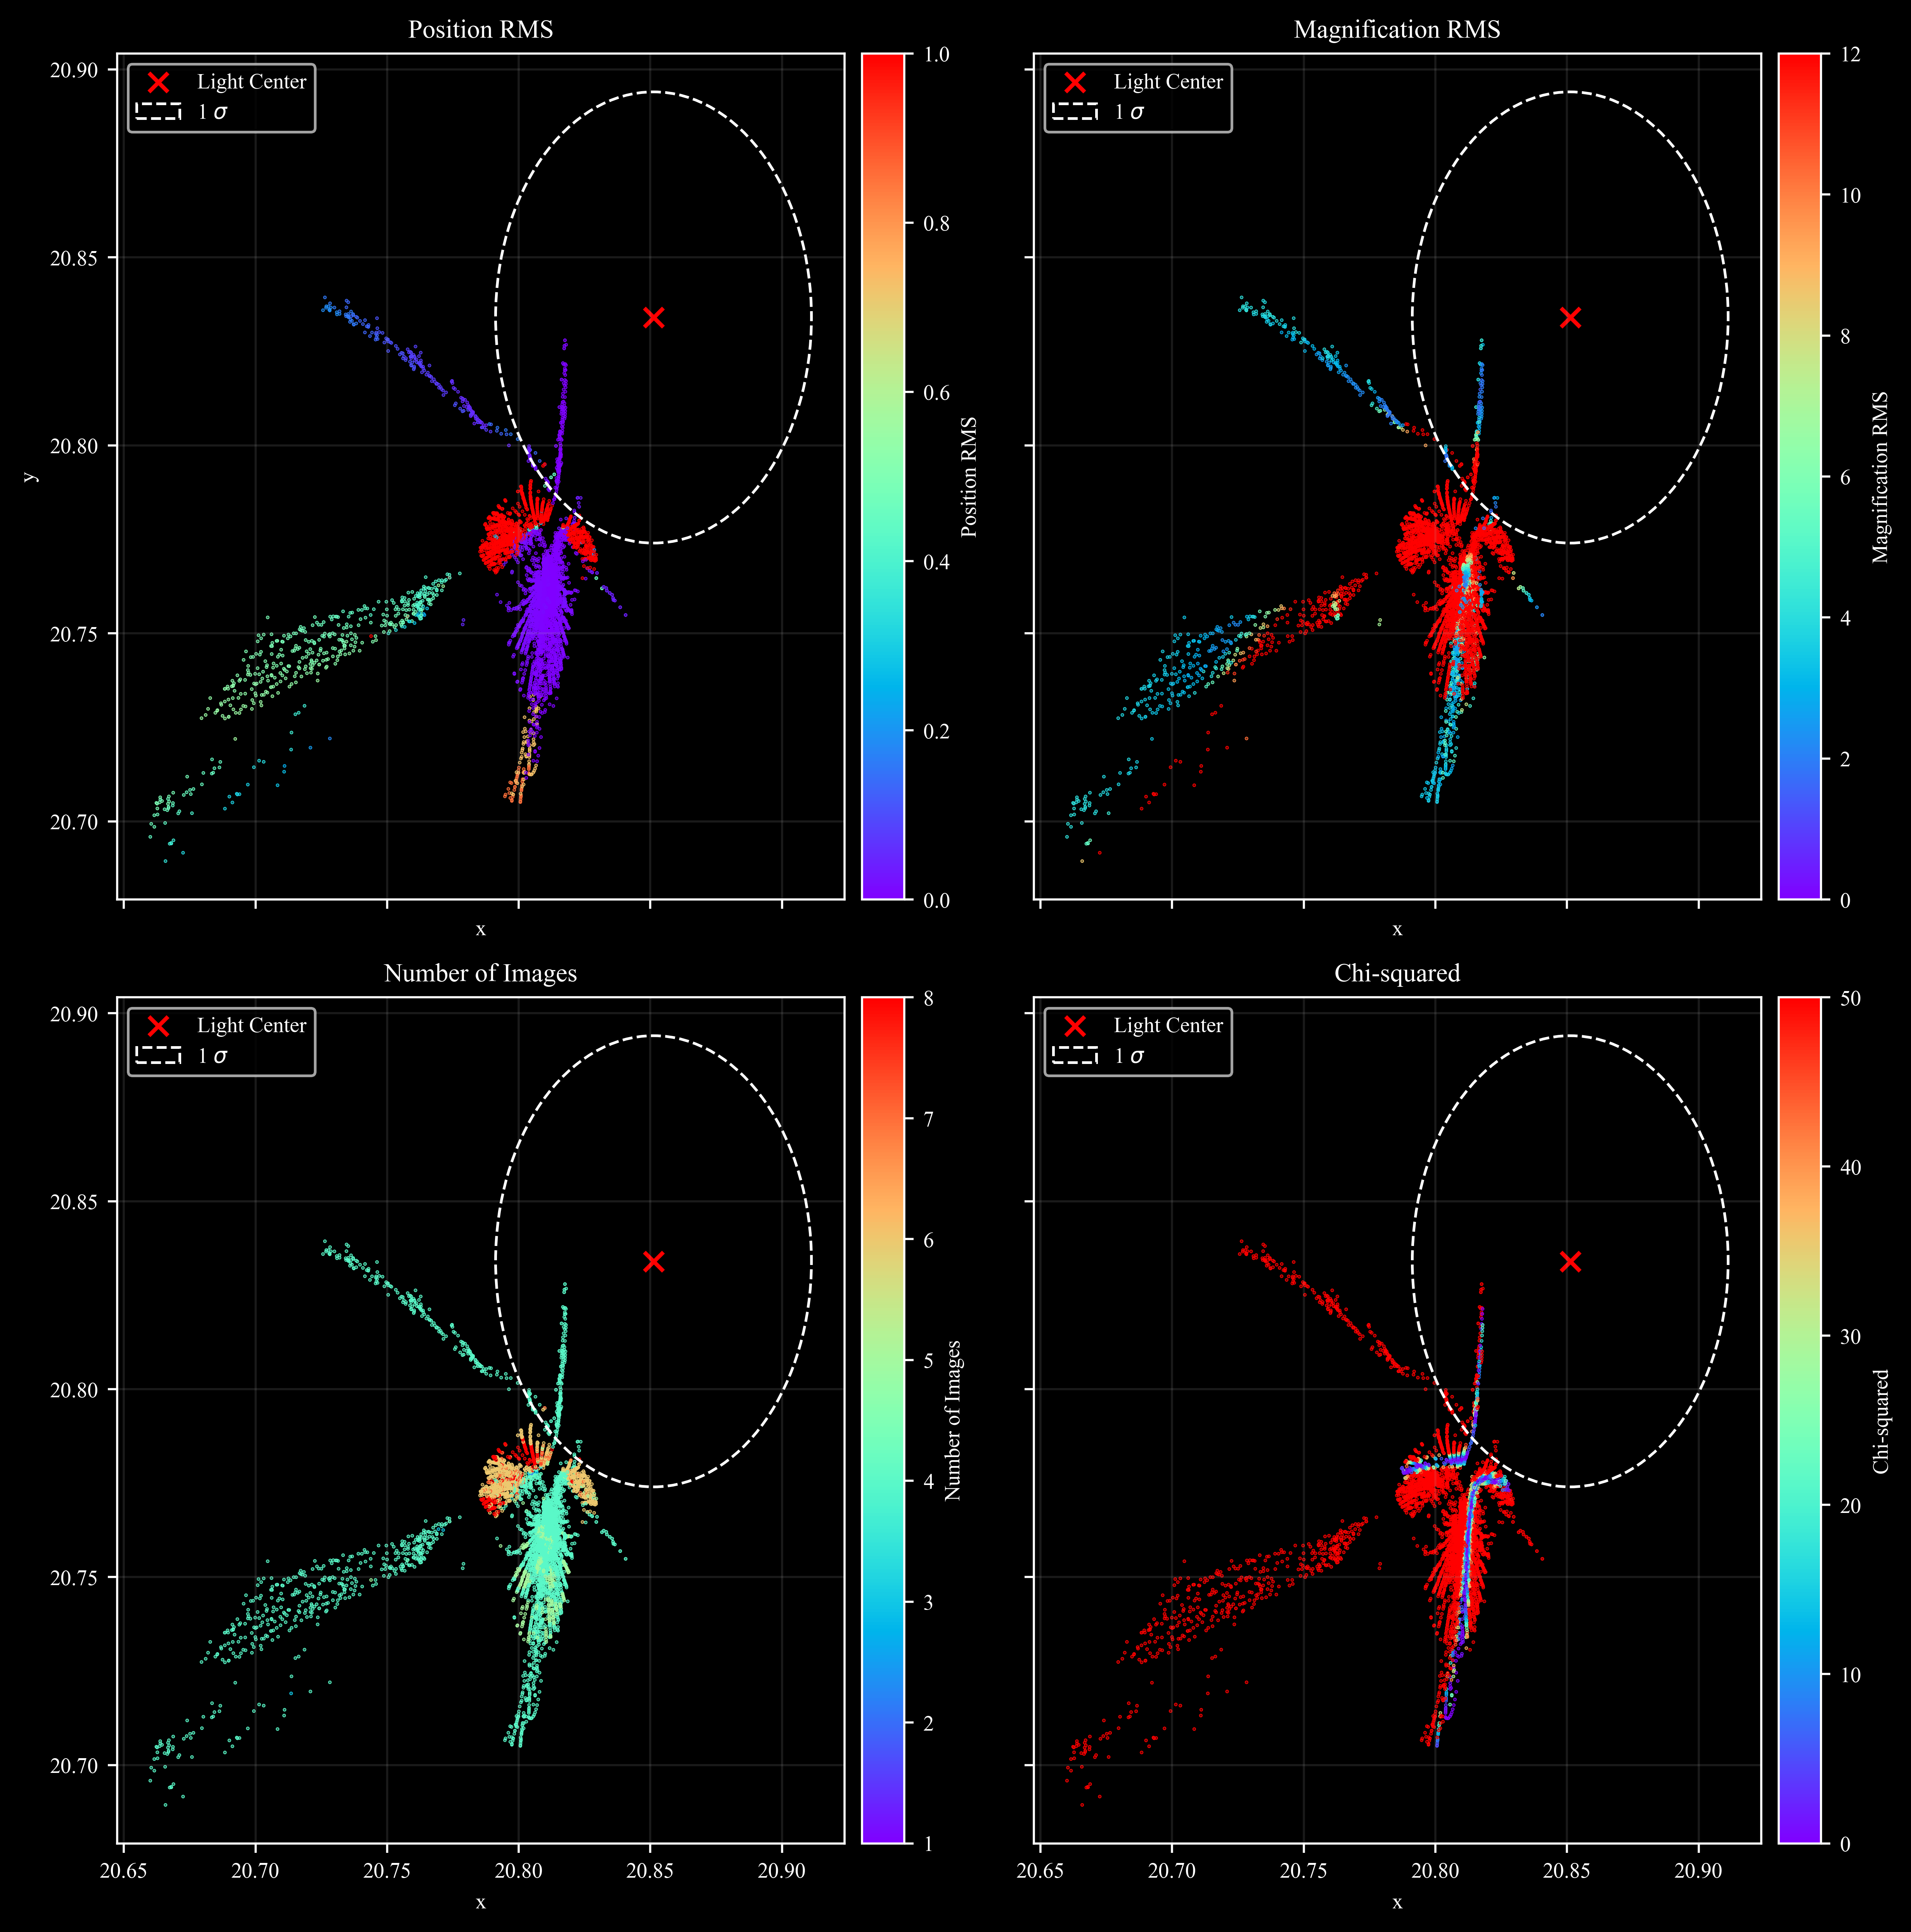

In [21]:
fig_comb, axs_comb = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Position RMS subplot
vmin_pr, vmax_pr = 0, 1
norm = colors.Normalize(vmin=vmin_pr, vmax=vmax_pr)
sc_pr = axs_comb[0, 0].scatter(df['x'], df['y'],
                               c=df['pos_rms'], s=0.1, cmap='rainbow',
                               norm=norm)
axs_comb[0, 0].scatter(20.8512217, 20.8340052, c='r', marker='x', s=50, label='Light Center')
circle = Circle((20.8512217, 20.8340052), radius=0.06, color='w', fill=False, linewidth=1, label='1 $\sigma$', linestyle='dashed')
axs_comb[0, 0].add_patch(circle)
axs_comb[0, 0].set_title('Position RMS', color='w')
axs_comb[0, 0].set_xlabel('x', color='w')
axs_comb[0, 0].set_ylabel('y', color='w')
axs_comb[0, 0].tick_params(colors='w')
axs_comb[0, 0].legend()
cbar_pr = fig_comb.colorbar(sc_pr, ax=axs_comb[0, 0], pad=0.02)
cbar_pr.set_label('Position RMS', color='w')
cbar_pr.ax.yaxis.set_tick_params(color='w')
cbar_pr.ax.yaxis.label.set_color('w')
plt.setp(cbar_pr.ax.get_yticklabels(), color='w')

# Magnitude RMS subplot
vmin_mg, vmax_mg = 0, 12
norm = colors.Normalize(vmin=vmin_mg, vmax=vmax_mg)
sc_mg = axs_comb[0, 1].scatter(df['x'], df['y'],
                               c=df['mag_rms'], s=0.1, cmap='rainbow',
                               norm=norm)
axs_comb[0, 1].scatter(20.8512217, 20.8340052, c='r', marker='x', s=50, label='Light Center')
circle = Circle((20.8512217, 20.8340052), radius=0.06, color='w', fill=False, linewidth=1, label='1 $\sigma$', linestyle='dashed')
axs_comb[0, 1].add_patch(circle)
axs_comb[0, 1].set_title('Magnification RMS', color='w')
axs_comb[0, 1].set_xlabel('x', color='w')
axs_comb[0, 1].tick_params(colors='w')
axs_comb[0, 1].legend()
cbar_mg = fig_comb.colorbar(sc_mg, ax=axs_comb[0, 1], pad=0.02)
cbar_mg.set_label('Magnification RMS', color='w')
cbar_mg.ax.yaxis.set_tick_params(color='w')
cbar_mg.ax.yaxis.label.set_color('w')
plt.setp(cbar_mg.ax.get_yticklabels(), color='w')

# Num Images Subplot
vmin_ni, vmax_ni = 1, 8
norm = colors.Normalize(vmin=vmin_ni, vmax=vmax_ni)
sc_ni = axs_comb[1, 0].scatter(df['x'], df['y'],
                               c=df['num_images'], s=0.1, cmap='rainbow',
                               norm=norm)
axs_comb[1, 0].scatter(20.8512217, 20.8340052, c='r', marker='x', s=50, label='Light Center')
circle = Circle((20.8512217, 20.8340052), radius=0.06, color='w', fill=False, linewidth=1, label='1 $\sigma$', linestyle='dashed')
axs_comb[1, 0].add_patch(circle)
axs_comb[1, 0].set_title('Number of Images', color='w')
axs_comb[1, 0].set_xlabel('x', color='w')
axs_comb[1, 0].tick_params(colors='w')
axs_comb[1, 0].legend()
cbar_ni = fig_comb.colorbar(sc_ni, ax=axs_comb[1, 0], pad=0.02)
cbar_ni.set_label('Number of Images', color='w')
cbar_ni.ax.yaxis.set_tick_params(color='w')
cbar_ni.ax.yaxis.label.set_color('w')
plt.setp(cbar_ni.ax.get_yticklabels(), color='w')

# Chi-squared subplot
vmin_chi, vmax_chi = 0, 50
norm = colors.Normalize(vmin=vmin_chi, vmax=vmax_chi)
sc_chi = axs_comb[1, 1].scatter(df['x'], df['y'],
                                c=df['chi2'], s=0.1, cmap='rainbow',
                                norm=norm)
axs_comb[1, 1].scatter(20.8512217, 20.8340052, c='r', marker='x', s=50, label='Light Center')
circle = Circle((20.8512217, 20.8340052), radius=0.06, color='w', fill=False, linewidth=1, label='1 $\sigma$', linestyle='dashed')
axs_comb[1, 1].add_patch(circle)
axs_comb[1, 1].set_title('Chi-squared', color='w')
axs_comb[1, 1].set_xlabel('x', color='w')
axs_comb[1, 1].tick_params(colors='w')
axs_comb[1, 1].legend()
cbar_chi = fig_comb.colorbar(sc_chi, ax=axs_comb[1, 1], pad=0.02)
cbar_chi.set_label('Chi-squared', color='w')
cbar_chi.ax.yaxis.set_tick_params(color='w')
cbar_chi.ax.yaxis.label.set_color('w')
plt.setp(cbar_chi.ax.get_yticklabels(), color='w')

for ax_ in axs_comb.flat:
    ax_.set_facecolor('black')
    ax_.grid(True, alpha=0.15)

plt.tight_layout()
plt.show()
